In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [5]:
tests = range(1, 7)

In [6]:
def plot(base_points, transformed_points, matched, title):
  plt.figure(figsize=(8, 6))
  plt.scatter(base_points[:, 0], base_points[:, 1], linestyle='-', marker='o', color='green', s=1, label='base')
  plt.scatter(transformed_points[:, 0], transformed_points[:, 1], linestyle='-', marker='o', color='blue', s=1, label='transformed')
  plt.scatter(matched[:, 0], matched[:, 1], linestyle='-', marker='o', color='red', s=1, label='matched')

  base_centroid = np.mean(base_points, axis=0)
  plt.scatter(*base_centroid, linestyle='-', marker='X', color='green', s=50, label='base')

  transformed_centroid = np.mean(transformed_points, axis=0)
  plt.scatter(*transformed_centroid, linestyle='-', marker='X', color='blue', s=50, label='transformed')

  # matched_centroid = np.mean(matched, axis=0)
  # plt.scatter(*matched_centroid, linestyle='-', marker='X', color='red', s=50, label='matched')

  plt.axhline(0, color='black',linewidth=0.5)
  plt.axvline(0, color='black',linewidth=0.5)
  plt.grid(True)
  plt.title(title)
  plt.legend()
  plt.show()

In [7]:
def show_result(test_number):
  base_points_path = f'data/test{test_number}a.csv'
  transformed_points_path = f'data/test{test_number}b.csv'
  result_points_path = f'results/test{test_number}.csv'
  base_points = np.loadtxt(base_points_path, delimiter=',', skiprows=1)
  transformed_points = np.loadtxt(transformed_points_path, delimiter=',', skiprows=1)
  result_points = np.loadtxt(result_points_path, delimiter=',', skiprows=1)

  plot(base_points, transformed_points, result_points, f'Test #{test_number}')

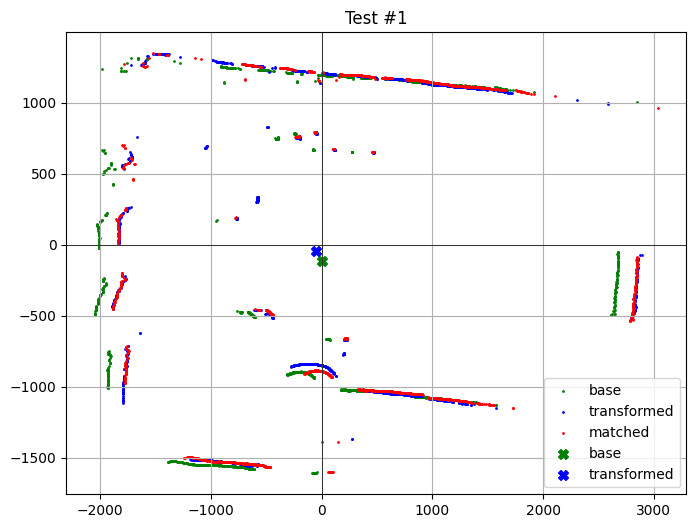

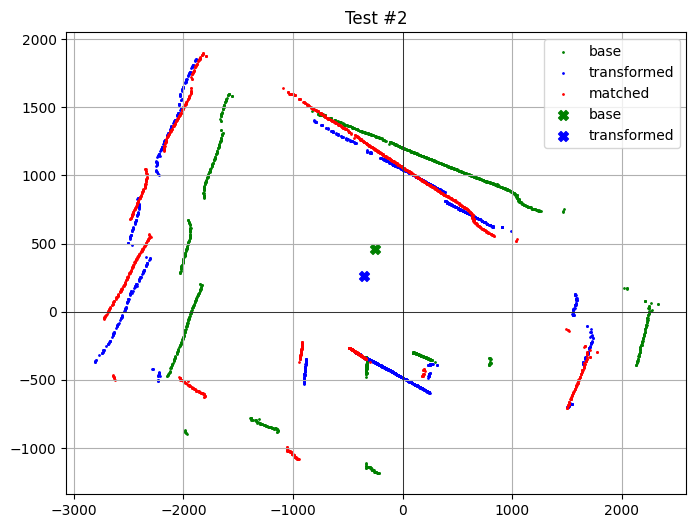

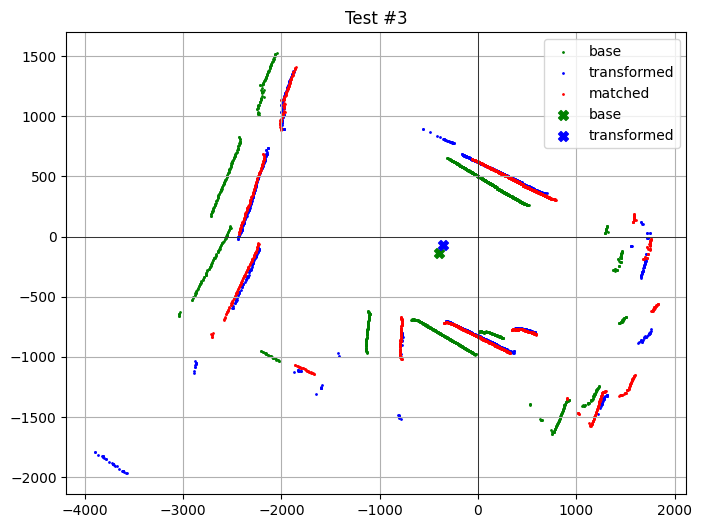

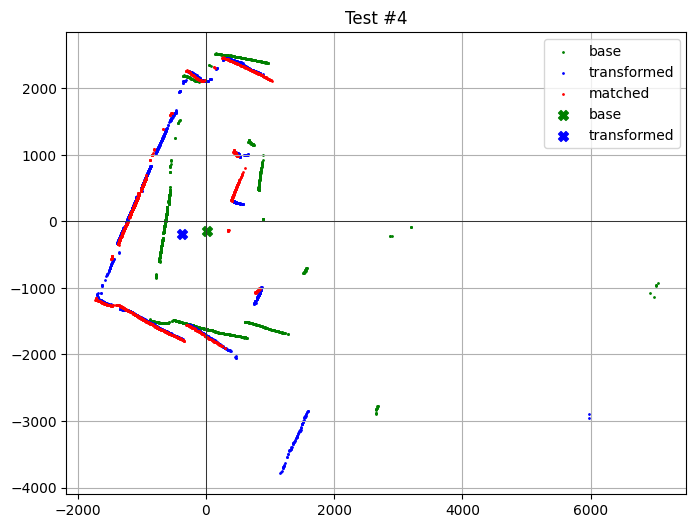

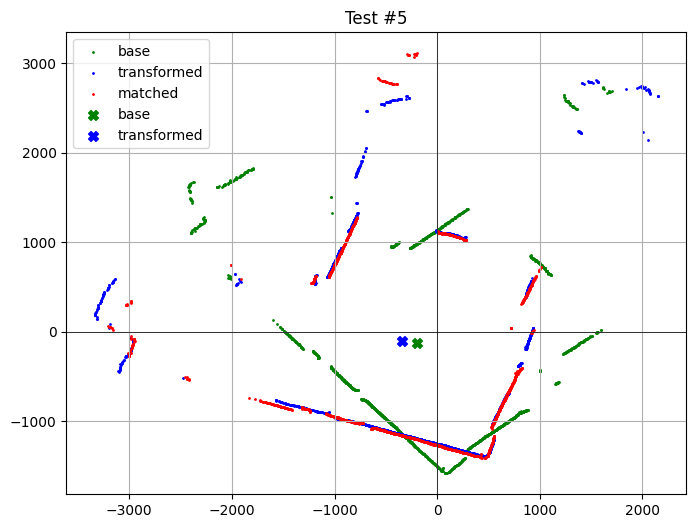

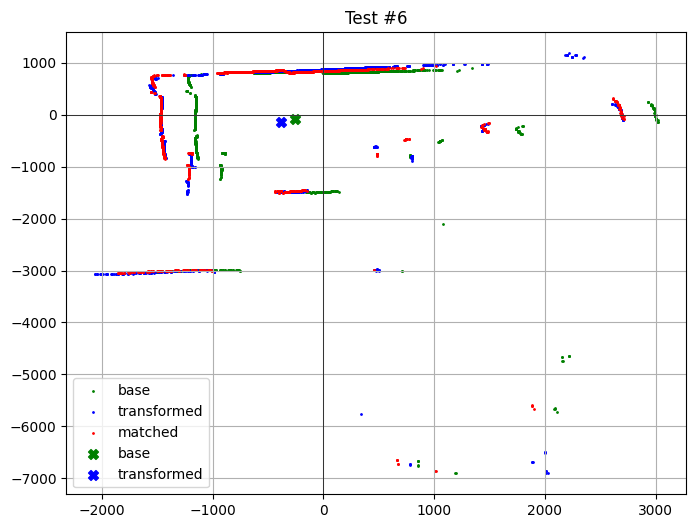

In [8]:
for test in tests:
  show_result(test)

In [17]:
def check_transformation(test_number):
    path = f'results/transformations{test_number}.json'
    with open(path, 'r') as file:
        data = json.load(file)  # Parse the JSON data

    R = np.array(data['rotationMatrix'])
    t = np.array(data['translation'])

    base_points_path = f'data/test{test_number}a.csv'
    transformed_points_path = f'data/test{test_number}b.csv'
    base_points = np.loadtxt(base_points_path, delimiter=',', skiprows=1)
    transformed_points = np.loadtxt(transformed_points_path, delimiter=',', skiprows=1)
    result_points = np.dot(base_points, R.T) + t

    plot(base_points, transformed_points, result_points, f'Test #{test_number}')

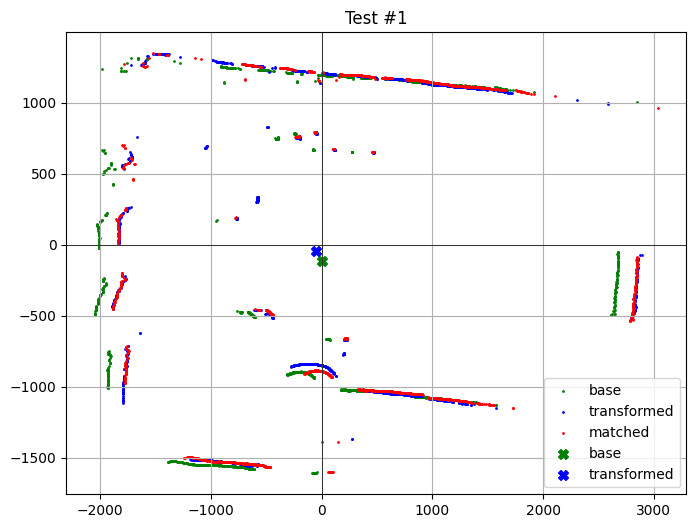

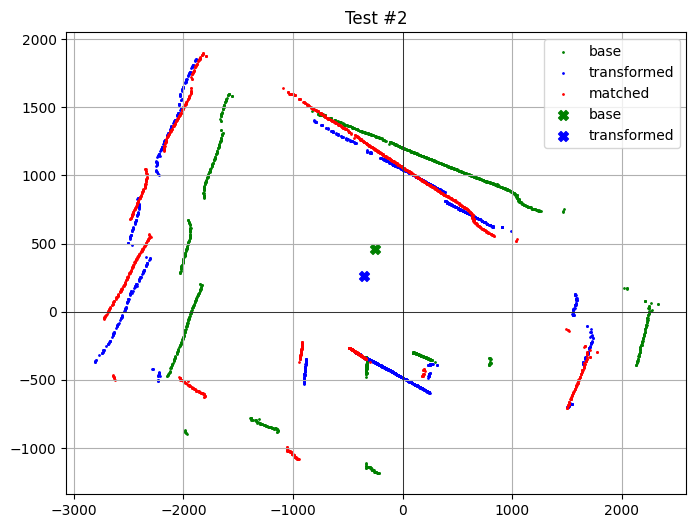

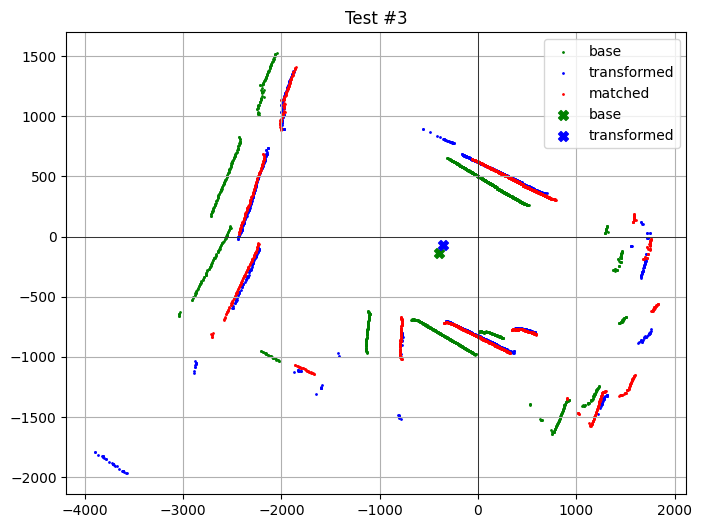

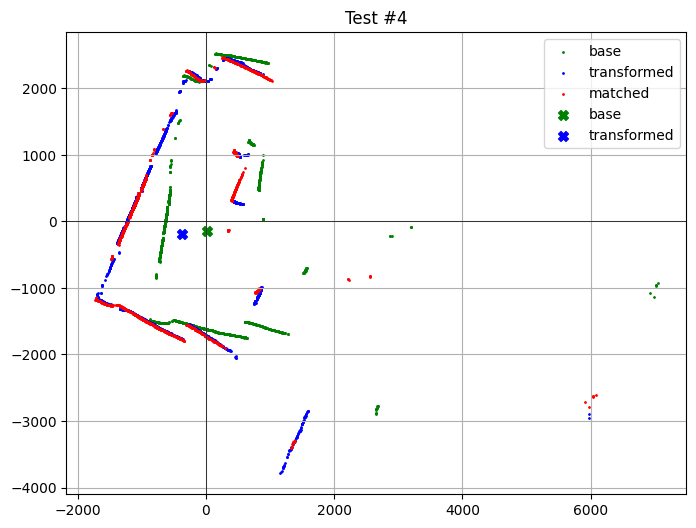

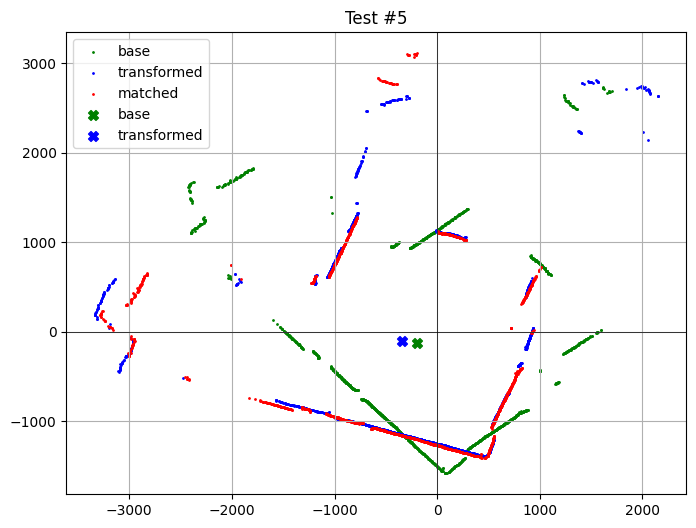

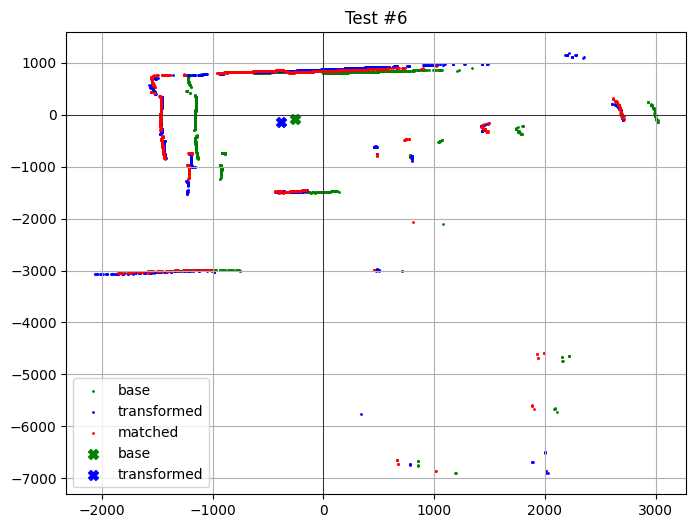

In [18]:
for test in tests:
  check_transformation(test)